# 1. 线性回归（简化模型）

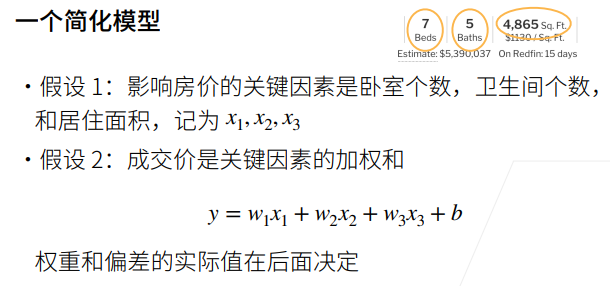

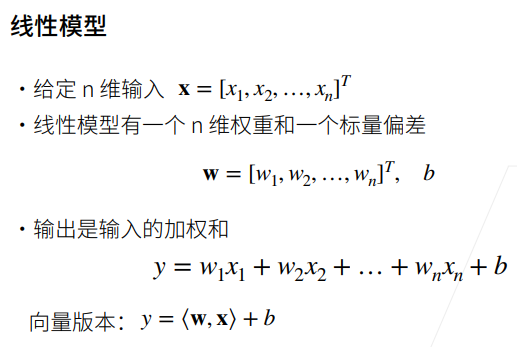

# 2. 神经网络

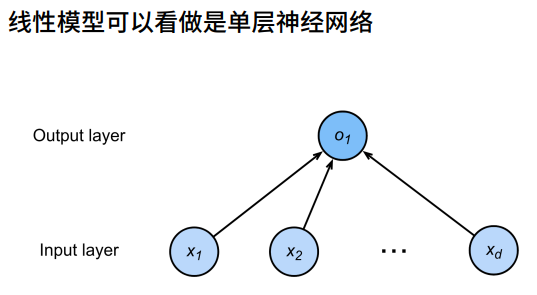

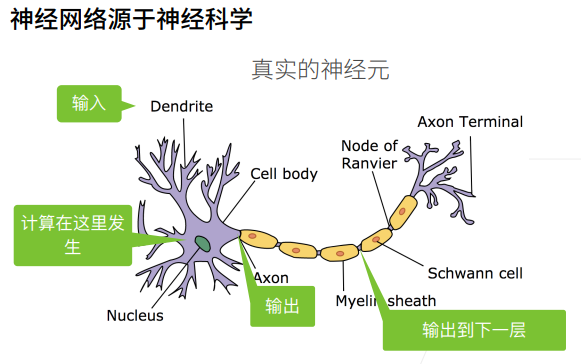

# 3. 线性回归（求最优解）

## 3.1衡量预估值

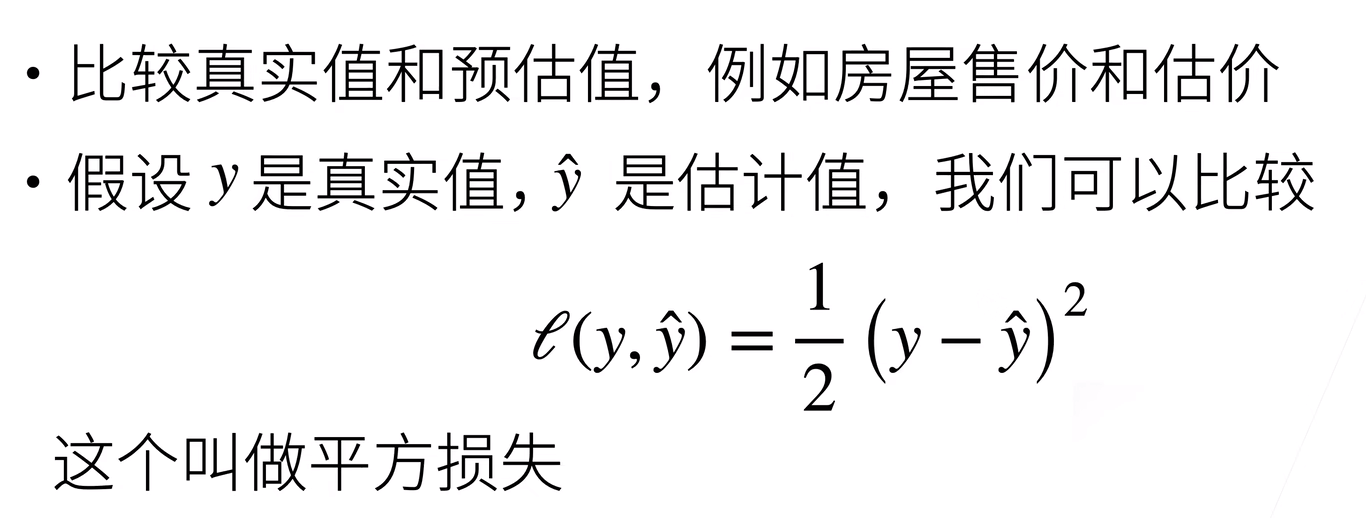

## 3.2训练数据

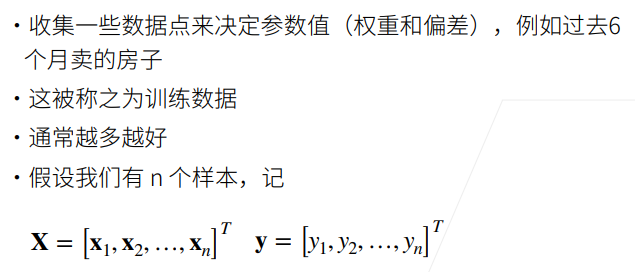

## 3.3 参数学习

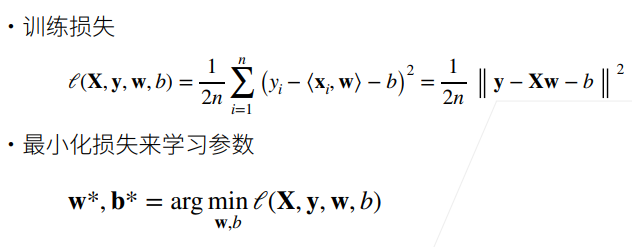

## 3.4显式解

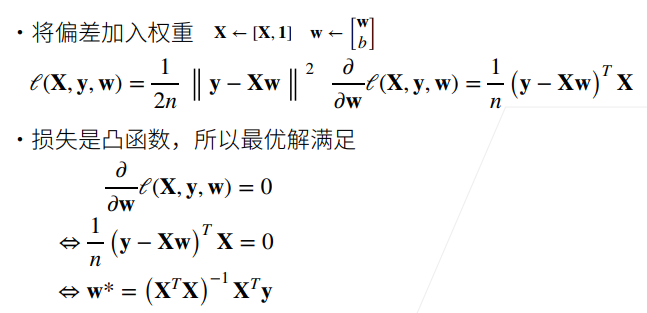

# 4. 线性回归（总结）

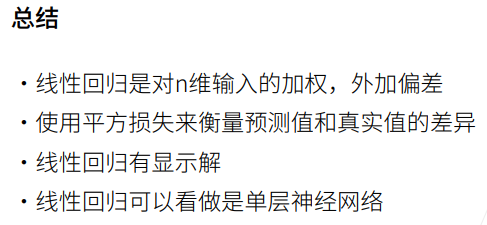

# 5. 优化方法

## 5.1 梯度下降法

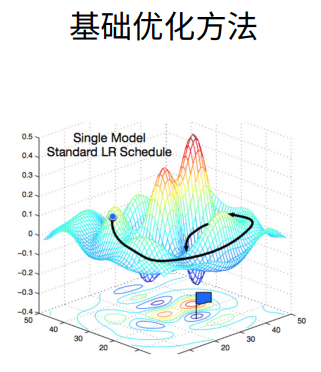

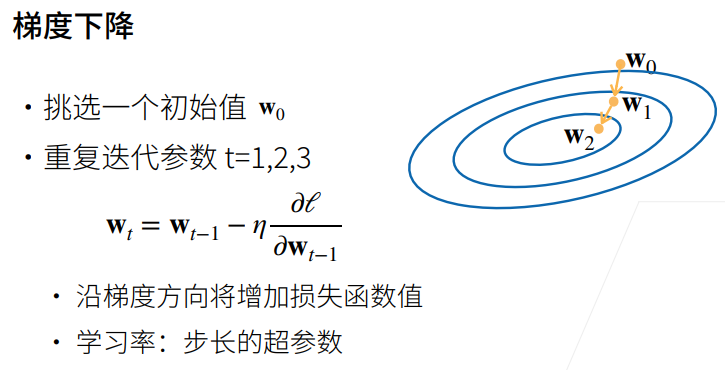

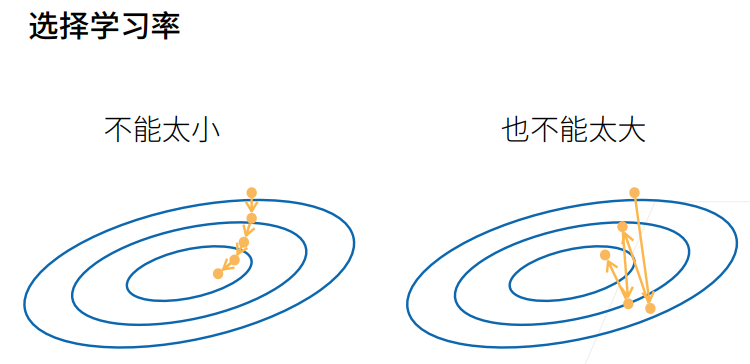

## 5.2 小批量随即梯度下降法

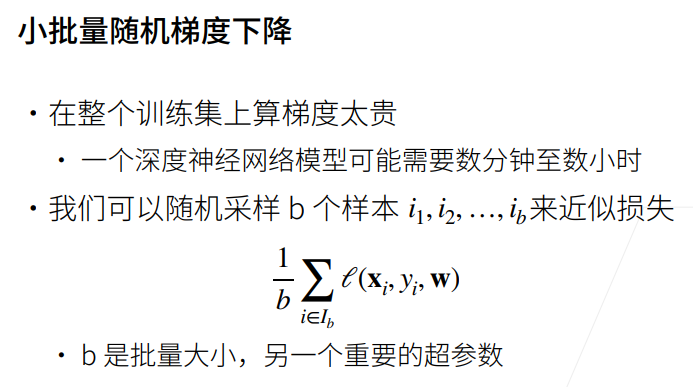

* 为什么使用小批量随即梯度下降法?
* 直接使用梯度下降，每次计算梯度，对整个损失函数求导，损失函数是对所有样本的平均损失，成本太大！
* 整个样本-->随机采样b个

## 5.3 选择批量大小

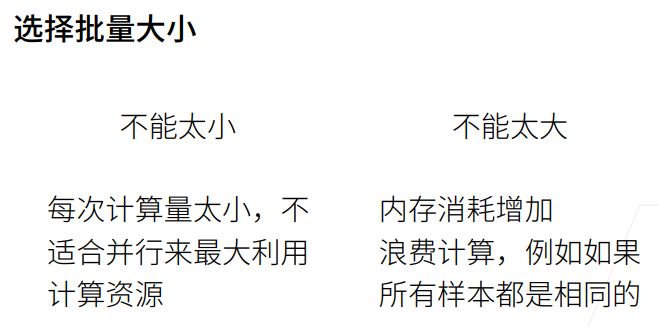

## 5.4 总结

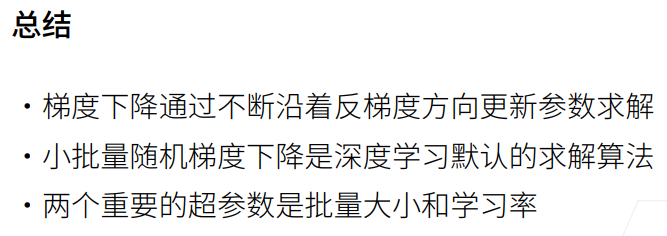

# 6. 线性回归（使用自定义）

① 将从零开始实现整个方法，包括数据流水线、模型、损失函数和小批量随即梯度下降优化器。

## 6.1 生成数据集

① 根据带有噪声的线性模型构造一个人造数据集。我们使用线性模型参数$\mathbf{w} = [2, -3.4]^\top$、$b = 4.2$和噪声项ϵ生成数据集及其标签：$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon$。

In [1]:
%matplotlib inline 
import random #进行随机梯度下降和随机初始化权重 #在plot的时候默认嵌入到notebook中
import torch
from d2l import torch as d2l

def synthetic_data(w,b,num_exaples):
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0,1,(num_exaples,len(w)))
    print("X[0:5,]:",X[0:5,])
    print("X.shape:",X.shape)
    y = torch.matmul(X,w) + b  #matmul(x,y)用于矩阵相乘
    print("y[0:5,]:",y[0:5])
    print("y.shape:",y.shape)
    y += torch.normal(0,0.01,y.shape)
    print("y.shape:",y.shape)
    return X, y.reshape((-1,1))  #(-1,1)在行数不确定的情况下，将张量的形状转成一列

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print("features.shape:",features.shape)
print("labels.shape:",labels.shape)

X[0:5,]: tensor([[-0.7202,  0.9278],
        [-1.7083, -1.0236],
        [ 0.1779,  1.1523],
        [ 1.3010,  1.5115],
        [-0.3173, -0.3477]])
X.shape: torch.Size([1000, 2])
y[0:5,]: tensor([-0.3948,  4.2635,  0.6380,  1.6627,  4.7474])
y.shape: torch.Size([1000])
y.shape: torch.Size([1000])
features.shape: torch.Size([1000, 2])
labels.shape: torch.Size([1000, 1])


## 6.2 绘制数据集

① features中每一行都包含一个二维数据样本，labels中的每一行都包含一维标签值（一个标签）。

features: tensor([0.1890, 2.7953]) 
label: tensor([-4.9174])


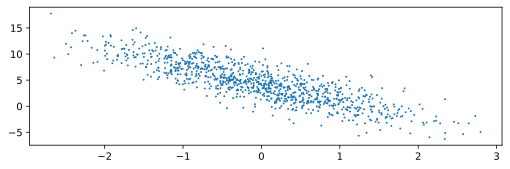

In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

def synthetic_data(w,b,num_exaples):
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0,1,(num_exaples,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:',features[0],'\nlabel:',labels[0])

d2l.set_figsize(figsize=(8.5, 2.5))
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)  # 只有detach后才能转到numpy里面去，分离出数值，不再计算梯度 ；1指的是绘制点的大小   

In [17]:
from d2l import torch as d2l
help(d2l.set_figsize)

Help on function set_figsize in module d2l.torch:

set_figsize(figsize=(3.5, 2.5))
    Set the figure size for matplotlib.
    
    Defined in :numref:`sec_calculus`



In [3]:
from d2l import torch as d2l
help(d2l.plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2 (typographic points are 1/72 in.).
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format string.
    
        Note that *c* should not be a single

## 6.3 读取小批量

features: tensor([1.5472, 0.4588]) 
label: tensor([5.7433])
tensor([[-1.1681, -0.8239],
        [-0.5530,  1.2158],
        [ 1.4653,  0.6320],
        [ 0.2079, -0.3962],
        [ 0.9551,  2.3127],
        [-0.7366,  1.6274],
        [-0.2324,  0.4410],
        [ 1.0741, -0.3617],
        [ 0.0620,  1.0283],
        [-0.5266, -0.8187]]) 
 tensor([[ 4.6477],
        [-1.0594],
        [ 4.9824],
        [ 5.9515],
        [-1.7269],
        [-2.7952],
        [ 2.2238],
        [ 7.5957],
        [ 0.8161],
        [ 5.9217]])


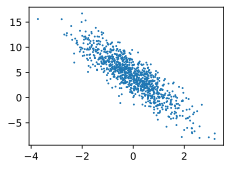

In [4]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

def synthetic_data(w,b,num_exaples):
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0,1,(num_exaples,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:',features[0],'\nlabel:',labels[0])

d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)   

# data_iter函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量
def data_iter(batch_size,features,labels):
    num_examples = len(features)  # 样本个数
    indices = list(range(num_examples)) # 样本索引
    # 这些样本是随即读取的，没有特定的顺序
    random.shuffle(indices) # 把索引随即打乱，以便使用随机的顺序访问样本
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)]) # 当i+batch_size超出时，取num_examples         
        yield features[batch_indices], labels[batch_indices] # 获得随即顺序的特征，及对应的标签
        
batch_size = 10
for X,y in data_iter(batch_size, features, labels):
    print(X, '\n', y) # 取一个批次后，就break跳出了
    break

### 理解 random.shuffle函数

In [12]:
import torch
import random
#A = torch.arange(12, dtype = torch.float32)
A = [1, 2, 3, 4, 5]
print("A(before shuffle):", A)
random.shuffle(A)
print("A(after shuffle):", A)

A(before shuffle): [1, 2, 3, 4, 5]
A(after shuffle): [5, 1, 3, 2, 4]


## 6.4 完整模型

features: tensor([ 1.5601, -2.4531]) 
label: tensor([15.6468])
tensor([[-1.0244, -1.6179],
        [ 1.8590, -1.4217],
        [ 1.0601, -1.8693],
        [-0.2542,  0.9446],
        [-0.2960, -0.4432],
        [ 1.2965,  1.5029],
        [-1.4769,  0.2448],
        [-1.3687,  0.9185],
        [-1.0793, -1.9088],
        [ 0.7726, -1.0402]]) 
 tensor([[ 7.6710],
        [12.7522],
        [12.6859],
        [ 0.4936],
        [ 5.1147],
        [ 1.6952],
        [ 0.4171],
        [-1.6618],
        [ 8.5409],
        [ 9.2958]])
epoch1,loss0.002829
epoch2,loss0.000051
epoch3,loss0.000050
epoch4,loss0.000050
epoch5,loss0.000050
epoch6,loss0.000050
epoch7,loss0.000051
epoch8,loss0.000050
epoch9,loss0.000050
epoch10,loss0.000050
w的估计误差：tensor([-3.6073e-04,  8.8215e-06], grad_fn=<SubBackward0>)
b的估计误差：tensor([-0.0002], grad_fn=<RsubBackward1>)


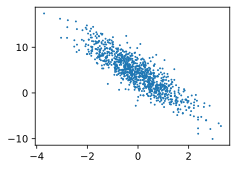

In [13]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

def synthetic_data(w,b,num_exaples):
    """生成 y = Xw + b + 噪声"""
    X = torch.normal(0,1,(num_exaples,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)
    return X, y.reshape((-1,1))

true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print('features:',features[0],'\nlabel:',labels[0])

d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)   

def data_iter(batch_size,features,labels):
    num_examples = len(features)  # 样本个数
    indices = list(range(num_examples)) # 样本索引
    # 这些样本是随即读取的，没有特定的顺序
    random.shuffle(indices) # 把索引随即打乱
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_examples)]) # 当i+batch_size超出时，取num_examples         
        yield features[batch_indices], labels[batch_indices] # 获得随即顺序的特征，及对应的标签
        
batch_size = 10
for X,y in data_iter(batch_size, features, labels):
    print(X, '\n', y) # 取一个批次后，就break跳出了
    break

# 定义初始化模型参数
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

# 定义模型
def linreg(X,w,b):
    """线性回归模型 liner regression"""
    return torch.matmul(X,w)+b

# 定义损失函数
def squared_loss(y_hat,y):
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape))**2/2 # 将y统一成与y_hat一样同尺寸   为什么没有除以batch_size？在下边进行梯度下降的时候除的

# 定义优化算法
def sgd(params,lr,batch_size):
    """小批量随即梯度下降"""
    with torch.no_grad(): # 不要产生梯度计算，减少内存消耗
        for param in params: # 每个参数进行遍历
            param -= lr * param.grad / batch_size # 每个参数进行更新，损失函数没有求均值，所以这里除以 batch_size 求了均值。由于乘法的线性关系，这里除以放在loss的除以是等价的。                          
            param.grad.zero_() # 每个参数的梯度清零

# 训练过程
lr = 0.04
num_epochs = 10  #整个数据扫描三遍
net = linreg # 这里用线性模型，这样写是很方便net赋予其他模型，只需要改一处，不需要下面所有网络模型名称都改
loss = squared_loss

# 训练过程
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y) # x和y的小批量损失
        # 因为l是形状是(batch_size,1)，而不是一个标量。l中所有元素被加到一起
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()  #计算梯度
        sgd([w,b],lr,batch_size) #使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')   

# 比较真实参数和通过训练学到的参数来评估训练的成功程度
print(f'w的估计误差：{true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b-b}')

# 7. 线性回归（使用框架）

In [14]:
import numpy as np
import torch
from torch.utils import data  #处理数据的模块
from d2l import torch as d2l
from torch import nn     #神经网络模块
    
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w,true_b,1000) # 库函数生成人工数据集    

# 调用框架现有的API来读取数据
def load_array(data_arrays,batch_size,is_train=True):
    """构造一个Pytorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays) # dataset相当于Pytorch的Dataset。一个星号*，表示对list解开入参。      
    return data.DataLoader(dataset,batch_size,shuffle=is_train) # 返回的是从dataset中随机挑选出batch_size个样本出来     

batch_size = 10
data_iter = load_array((features,labels),batch_size) # 返回的数据的迭代器
print("next(iter(data_iter)):", next(iter(data_iter))) # iter(data_iter) 是一个迭代器对象，next是取迭代器里面的元素  

# 使用框架的预定义好的层
# nn是神经网络的缩写
net = nn.Sequential(nn.Linear(2,1)) #线性回归对应的是nn的线性层（全连接层），指定层的输入输出维度即可；Sequential容器理解为list of liners

# 初始化模型参数
net[0].weight.data.normal_(0,0.01) # 使用正态分布替换掉weight变量里面的数据值
net[0].bias.data.fill_(0)  # 偏差bias变量里面的值设置为0
print(net[0])

# 计算均方误差使用的是MSELoss类，也称为平方L2范数
loss = nn.MSELoss()  #L1是算术差，L2是平方差

# 实例化SGD实例
trainer = torch.optim.SGD(net.parameters(),lr=0.03)

# 训练过程代码与从零开始时所做的非常相似
num_epochs = 10
for epoch in range(num_epochs):
    for X, y in data_iter:  # 从DataLoader里面一次一次把所有数据拿出来
#         print("X:",X)
#         print("y:",y)
        l = loss(net(X),y) # net(X) 为计算出来的线性回归的预测值
        trainer.zero_grad() # 梯度清零
        l.backward()
        trainer.step()  # SGD优化器优化模型
    l = loss(net(features),labels)
    print(f'epoch{epoch+1},loss{l:f}')

next(iter(data_iter)): [tensor([[-1.1046, -0.4302],
        [-1.6972, -1.1841],
        [ 0.1448, -0.0457],
        [-0.3802,  0.8306],
        [-0.8894, -0.1294],
        [-1.4551,  0.5958],
        [ 0.5424, -0.1513],
        [ 1.4869, -0.4610],
        [ 1.3187,  0.7478],
        [-1.8842, -0.0170]]), tensor([[ 3.4439],
        [ 4.8410],
        [ 4.6387],
        [ 0.6081],
        [ 2.8718],
        [-0.7259],
        [ 5.8094],
        [ 8.7588],
        [ 4.2813],
        [ 0.4840]])]
Linear(in_features=2, out_features=1, bias=True)
epoch1,loss0.000339
epoch2,loss0.000099
epoch3,loss0.000099
epoch4,loss0.000100
epoch5,loss0.000099
epoch6,loss0.000100
epoch7,loss0.000100
epoch8,loss0.000099
epoch9,loss0.000099
epoch10,loss0.000100
